# Children with Medical Complex Conditions

## Part 1: Young Adults 

## Data 
MIMIC-III (Medical Information Mart for Intensive Care III) is an open access hospital database. It contains de-identified data from over 40,000 patients who were admitted to Beth Israel Deaconess Medical Center in Boston, Massachusetts, from 2001 to 2012.
To gain authorization to the access the data go to (https://mimic.physionet.org/gettingstarted/access/).
The data has been dowloaded, however due to xx

In this project, we will make use of the following MIMIC tables:

- PATIENTS - a table containing information about the patient (with contains all notes for each hospitalization (links with ADMISSIONS on SUBJECT_ID)
- ADMISSIONS - a table containing admission and discharge dates (has a unique identifier HADM_ID for each admission and links with PATIENTS on SUBJECT_ID)
- NOTEEVENTS - contains all notes for each hospitalization (links with ADMISSIONS on HADM_ID and with PATIENTS on SUBJECT_ID)



The databases are released under the Health Insurance Portability and Accountability Act (HIPAA) safe harbor provision.



In [ ]:
# load the compressed files 


import gzip

for filename in ["data/PATIENTS.csv.gz","data/ADMISSIONS.csv.gz", "data/NOTEEVENTS.csv.gz"]:
    with gzip.open(filename, 'rt') as f:
        data = f.read()
        
    with open(filename[:-3], 'wt') as f:
        f.write(data)

In [1]:
# load admissions table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import datetime 

# read patients table
patient_df = pd.read_csv('data/PATIENTS.csv')

patient_df.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [2]:
patient_df.shape

(46520, 8)

In [3]:
# full list of columns containing the data categories 
categories = patient_df.columns.ravel()

In [4]:
categories

array(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP',
       'DOD_SSN', 'EXPIRE_FLAG'], dtype=object)

A note about dates from MIMIC website:

DOB has only been shifted for patients older than 89. 

All dates in the database have been shifted to protect patient confidentiality. Dates will be internally consistent for the same patient, but randomly distributed in the future.

In [5]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
ROW_ID         46520 non-null int64
SUBJECT_ID     46520 non-null int64
GENDER         46520 non-null object
DOB            46520 non-null object
DOD            15759 non-null object
DOD_HOSP       9974 non-null object
DOD_SSN        13378 non-null object
EXPIRE_FLAG    46520 non-null int64
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


In [6]:
# convert to dates
patient_df.DOB = pd.to_datetime(patient_df.DOB, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
patient_df.DOD = pd.to_datetime(patient_df.DOD, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
patient_df.DOD_HOSP = pd.to_datetime(patient_df.DOD_HOSP, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
patient_df.DOD_SSN = pd.to_datetime(patient_df.DOD_SSN,format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')


In [7]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
ROW_ID         46520 non-null int64
SUBJECT_ID     46520 non-null int64
GENDER         46520 non-null object
DOB            46520 non-null datetime64[ns]
DOD            15759 non-null datetime64[ns]
DOD_HOSP       9974 non-null datetime64[ns]
DOD_SSN        13378 non-null datetime64[ns]
EXPIRE_FLAG    46520 non-null int64
dtypes: datetime64[ns](4), int64(3), object(1)
memory usage: 2.8+ MB


In [8]:
# read admissions table
adm_df = pd.read_csv('data/ADMISSIONS.csv')

adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [9]:
# show dimensions
adm_df.shape

(58976, 19)

In [10]:
# full list of columns containing the data categories 
categories = adm_df.columns.ravel()

In [11]:
categories

array(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype=object)

In [12]:
# convert to dates
adm_df.ADMITTIME = pd.to_datetime(adm_df.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
adm_df.DISCHTIME = pd.to_datetime(adm_df.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
adm_df.DEATHTIME = pd.to_datetime(adm_df.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')


In [13]:
adm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
ROW_ID                  58976 non-null int64
SUBJECT_ID              58976 non-null int64
HADM_ID                 58976 non-null int64
ADMITTIME               58976 non-null datetime64[ns]
DISCHTIME               58976 non-null datetime64[ns]
DEATHTIME               5854 non-null datetime64[ns]
ADMISSION_TYPE          58976 non-null object
ADMISSION_LOCATION      58976 non-null object
DISCHARGE_LOCATION      58976 non-null object
INSURANCE               58976 non-null object
LANGUAGE                33644 non-null object
RELIGION                58518 non-null object
MARITAL_STATUS          48848 non-null object
ETHNICITY               58976 non-null object
EDREGTIME               30877 non-null object
EDOUTTIME               30877 non-null object
DIAGNOSIS               58951 non-null object
HOSPITAL_EXPIRE_FLAG    58976 non-null int64
HAS_CHARTEVENTS_DATA    58976 non-null int64

In [14]:
# merge datasets
df_adm_pat = pd.merge(adm_df[['SUBJECT_ID','HADM_ID','ADMITTIME']],
                        patient_df[['SUBJECT_ID', 'DOB','EXPIRE_FLAG']], 
                        on = ['SUBJECT_ID'],
                        how = 'left')

assert len(adm_df) == len(df_adm_pat), 'Number of rows increased'


In [15]:
df_adm_pat.shape

(58976, 5)

To determine the mortality rate we must first select the proper age group. We define children as those patients who are 16 years old or below at the date of their first admission. To perform this query, we use patient admission dates and dates of birth.

In [16]:
# sort by subject_ID and admission date
df_adm_pat = df_adm_pat.sort_values(['SUBJECT_ID','ADMITTIME'])
df_adm_pat = df_adm_pat.reset_index(drop = True)


In [17]:
# verify that it did what we wanted
df_adm_pat.loc[df_adm_pat.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME']]

,SUBJECT_ID,ADMITTIME
165,124,2160-06-24 21:25:00
166,124,2161-12-17 03:39:00
167,124,2165-05-21 21:02:00
168,124,2165-12-31 18:55:00


In [18]:
df_adm_pat['first_admitance']= df_adm_pat.groupby(['SUBJECT_ID'])['ADMITTIME'].transform('min')



In [19]:
df_adm_pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 6 columns):
SUBJECT_ID         58976 non-null int64
HADM_ID            58976 non-null int64
ADMITTIME          58976 non-null datetime64[ns]
DOB                58976 non-null datetime64[ns]
EXPIRE_FLAG        58976 non-null int64
first_admitance    58976 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(3)
memory usage: 2.7 MB


In [20]:

df_adm_pat['first_admitance'] = pd.to_datetime(df_adm_pat.first_admitance,errors='coerce', format = '%Y-%m-%d')

df_adm_pat['DOB'] = pd.to_datetime(df_adm_pat.DOB,errors='coerce',format = '%Y-%m-%d')




In [21]:
df_adm_pat.head()


,SUBJECT_ID,HADM_ID,ADMITTIME,DOB,EXPIRE_FLAG,first_admitance
0,2,163353,2138-07-17 19:04:00,2138-07-17,0,2138-07-17 19:04:00
1,3,145834,2101-10-20 19:08:00,2025-04-11,1,2101-10-20 19:08:00
2,4,185777,2191-03-16 00:28:00,2143-05-12,0,2191-03-16 00:28:00
3,5,178980,2103-02-02 04:31:00,2103-02-02,0,2103-02-02 04:31:00
4,6,107064,2175-05-30 07:15:00,2109-06-21,0,2175-05-30 07:15:00


In [22]:
df_adm_pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 6 columns):
SUBJECT_ID         58976 non-null int64
HADM_ID            58976 non-null int64
ADMITTIME          58976 non-null datetime64[ns]
DOB                58976 non-null datetime64[ns]
EXPIRE_FLAG        58976 non-null int64
first_admitance    58976 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(3)
memory usage: 2.7 MB


In [23]:

df_adm_pat['age_first_adm'] = (df_adm_pat['first_admitance'] - df_adm_pat['DOB']).dt.days // 365 
# df_adm_pat['age'] = np.where(df_adm_pat['age'] < 0, 90, df_adm_pat['age']) 
# df_adm_pat['age'].isnull().sum() 

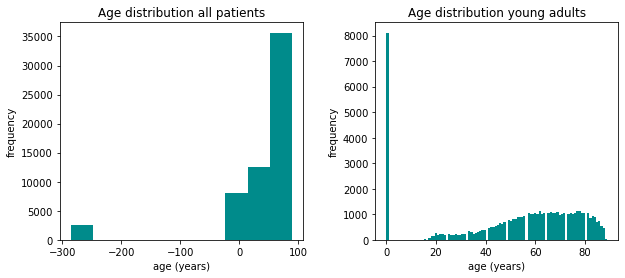

In [49]:
# age distribution

# binsize = 10
# bins = np.arange(0, df_adm_pat['age_first_adm'].max()+ 5*binsize, binsize)
# # df_adm_pat[df_adm_pat['age_first_adm'] >= 16]
# plt.figure(figsize=[8, 5])
# # plt.hist(data = df_adm_pat[df_adm_pat['age_first_adm']>= 0] , x = 'age_first_adm', bins = bins, color="darkcyan")
# plt.hist(df_adm_pat['age_first_adm'] , bins = bins, color="darkcyan")

# plt.xlabel('age distribution of ')
# plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_adm_pat.hist('age_first_adm', bins=10,ax=axes[0],color='darkcyan', grid = False)
df_adm_pat[df_adm_pat['age_first_adm']>= 0].hist('age_first_adm', bins=100,ax=axes[1],color='darkcyan', grid = False)
axes[0].set(title='Age distribution all patients',xlabel='age (years)', ylabel='frequency' )
axes[1].set(title='Age distribution young adults',xlabel='age (years)', ylabel='frequency')
plt.show()

In [25]:
# choose patients that were younger than 16 years at the time of their first admission

df_adm_children = df_adm_pat[df_adm_pat['age_first_adm'] <= 16]


In [27]:
df_adm_children.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10758 entries, 0 to 58956
Data columns (total 7 columns):
SUBJECT_ID         10758 non-null int64
HADM_ID            10758 non-null int64
ADMITTIME          10758 non-null datetime64[ns]
DOB                10758 non-null datetime64[ns]
EXPIRE_FLAG        10758 non-null int64
first_admitance    10758 non-null datetime64[ns]
age_first_adm      10758 non-null int64
dtypes: datetime64[ns](3), int64(4)
memory usage: 672.4 KB


In [ ]:
#MIMIC-III does not contain data from paediatric patients.


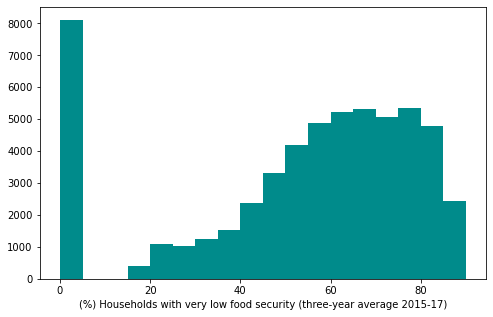

In [44]:
# distribution of values

binsize = 5
bins = np.arange(0, df_adm_pat['age_first_adm'].max()+ 1*binsize, binsize)
# df_adm_pat[df_adm_pat['age_first_adm'] >= 16]
plt.figure(figsize=[8, 5])
plt.hist(data = df_adm_pat[df_adm_pat['age_first_adm']>= 0] , x = 'age_first_adm', bins = bins, color="darkcyan")
plt.xlabel('(%) Households with very low food security (three-year average 2015-17)')
plt.show()

In [33]:
df_adm_pat['age_first_adm'].max()

89